In [ ]:
from google.colab import files
uploaded = files.upload()

Saving game_sessions_data.csv to game_sessions_data.csv


In [ ]:
# تثبيت المكتبات
!pip install matplotlib seaborn scikit-learn --quiet

# استيراد المكتبات
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# تحميل البيانات من ملف CSV
df = pd.read_csv("/content/game_sessions_data.csv")  # ارفعي الملف إلى Colab أولاً


In [ ]:
# عرض أول صفوف
print("Head of the dataset:")
print(df.head())

# توزيع النتائج
print("\nResult distribution:")
print(df['result'].value_counts())

# إحصائيات عامة
print("\nDescriptive statistics:")
print(df[['movesCount', 'durationSeconds']].describe())

# تحويل نتيجة الفوز/الخسارة إلى أرقام
df['result_binary'] = df['result'].map({'win': 1, 'lose': 0})


Head of the dataset:
  result  movesCount                                              moves  \
0   lose         170  ['left', 'up', 'right', 'right', 'down', 'left...   
1    win         145  ['up', 'right', 'down', 'left', 'down', 'right...   
2   lose         122  ['up', 'left', 'up', 'left', 'up', 'left', 'up...   
3    win         174  ['down', 'right', 'up', 'left', 'up', 'right',...   
4   lose         123  ['right', 'up', 'up', 'up', 'up', 'up', 'up', ...   

   durationSeconds                 timestamp  
0          230.739  2025-05-16T12:49:25.096Z  
1          780.878  2025-05-16T12:53:21.019Z  
2           16.741  2025-05-16T13:06:28.037Z  
3          202.763  2025-05-16T13:06:50.391Z  
4           44.709  2025-05-16T13:10:25.972Z  

Result distribution:
result
lose    30
win     18
Name: count, dtype: int64

Descriptive statistics:
       movesCount  durationSeconds
count   48.000000        48.000000
mean   128.916667        82.906813
std     40.702257       116.907163
min 

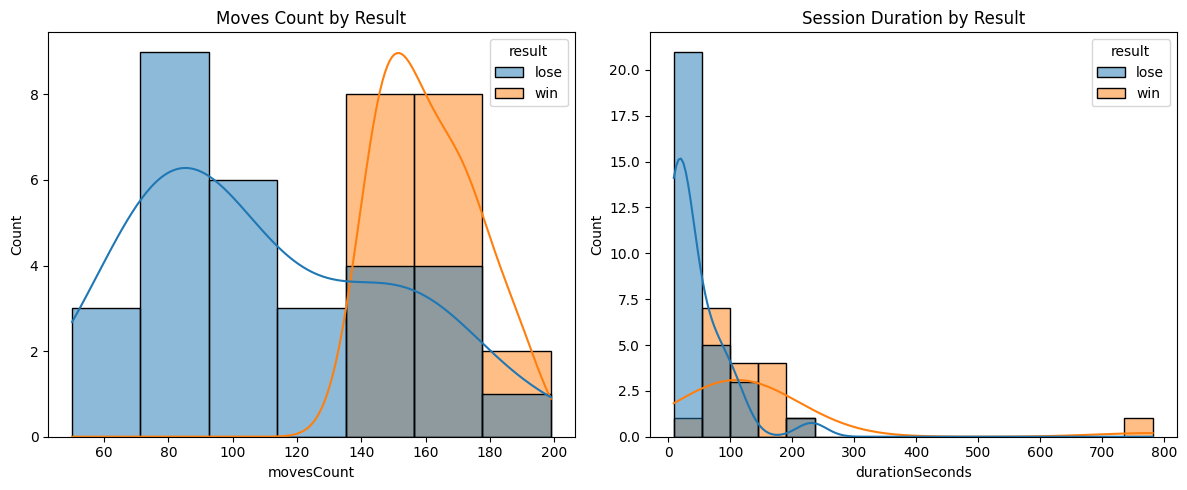

In [ ]:
plt.figure(figsize=(12, 5))

# عدد الحركات حسب النتيجة
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='movesCount', hue='result', kde=True)
plt.title("Moves Count by Result")

# مدة اللعب حسب النتيجة
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='durationSeconds', hue='result', kde=True)
plt.title("Session Duration by Result")

plt.tight_layout()
plt.show()


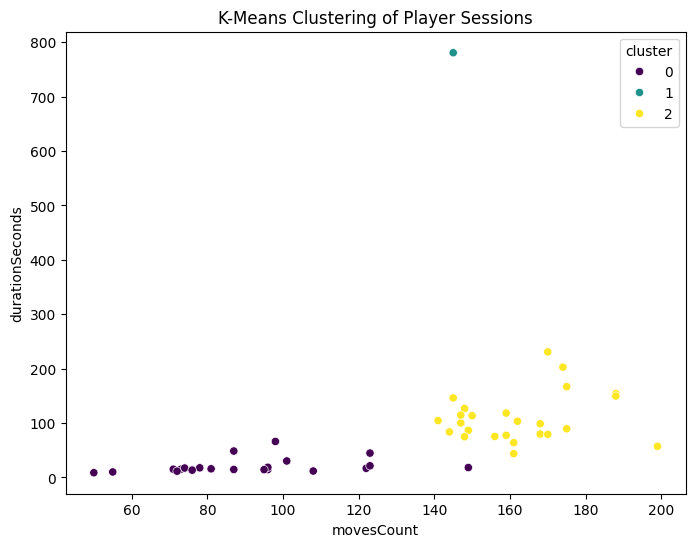

In [ ]:
features = df[['movesCount', 'durationSeconds']]
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(features)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='movesCount', y='durationSeconds', hue='cluster', palette='viridis')
plt.title("K-Means Clustering of Player Sessions")
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.25      1.00      0.40         1

    accuracy                           0.70        10
   macro avg       0.62      0.83      0.60        10
weighted avg       0.93      0.70      0.76        10


Confusion Matrix:
[[6 3]
 [0 1]]


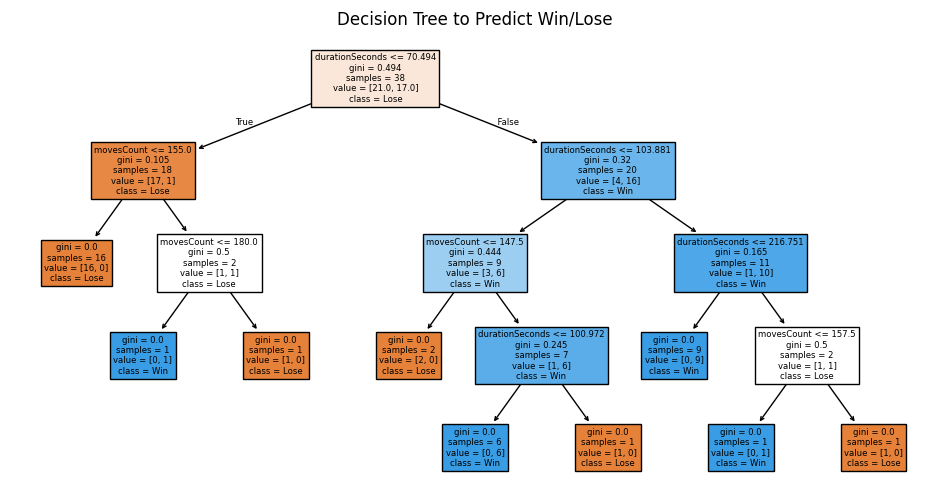

In [ ]:
X = df[['movesCount', 'durationSeconds']]
y = df['result_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=['movesCount', 'durationSeconds'], class_names=['Lose', 'Win'], filled=True)
plt.title("Decision Tree to Predict Win/Lose")
plt.show()


In [ ]:
threshold = df[df['result'] == 'lose'][['movesCount', 'durationSeconds']].mean()

print("\n🔎 Insight:")
print(f"معظم اللاعبين الذين يخسرون لديهم عدد حركات ≈ {threshold['movesCount']:.1f} ومدة لعب ≈ {threshold['durationSeconds']:.1f} ثانية.")
print("💡 التوصية: أضف عنصر مساعدة أو شرح في هذا النطاق الزمني لمساعدة اللاعبين.")



🔎 Insight:
معظم اللاعبين الذين يخسرون لديهم عدد حركات ≈ 109.7 ومدة لعب ≈ 43.0 ثانية.
💡 التوصية: أضف عنصر مساعدة أو شرح في هذا النطاق الزمني لمساعدة اللاعبين.
